#### Exploratory Analysis of Central Park Squirrel DataSet

In Central Park, NYC there is plenty of squirrels and they are tracked! We would like to know more about them and their behaviour so:

TABLE 
1. Description
2. Approach
3. Analysis Implementation


* Make a sociological study about squirrels in Central Park in terms of how they interact between them and towards people.
* Squirrels no jokin'. We suspect there are organized squirrel gangs (maybe dealing with nuts), can you confirm/deny this?
* Friends or foes. Is their friendliness random or related to specific factors?

In [1]:
import pandas as pd 
from pandas_profiling import ProfileReport
import scipy
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
import seaborn as sns

/Users/gemaparreno/Documents/venv/lib/python3.8/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
### Main Data Functions

def read_data(path):
    """
    Loads dataset.
    
    Args: 
        path: path where the dataset is stored
    Returns:
        Pandas dataframe    
    """
    df = pd.read_csv(path)
    return df

def filter_by_column(df, column, value):
    """
    Filter the dataset by column and value.
    
    Args:
        df: Pandas dataframe
        column: column criteria to split
        value: splitting value
    Returns:
        Pandas dataframe
    """
    mask = df[column] == value
    df_filtered = df[mask]
    return df_filtered


def eda(df, titleeda, outputfile):
    """
    Perform automatic analysis of each dataset.
    
    Args:
        df: Pandas dataframe
        title_eda: exploratory analysis title file
        output_file: exploratory analysis name file
    Returns:
        Exploratory analysis html file
    """
    profile = ProfileReport(df, title=titleeda)
    profile.to_file(outputfile)
    return profile

def date_format(df):
    """Transform dataset date format
    Args:
        df: Pandas DataFrame
    Returns:
        Pandas Dataframe    
    """
    df['Date'] = df['Date'].values.astype(str)
    df['Date'] = pd.to_datetime(data['Date'], format = '%m%d%Y')
    return df

def filter_dataset(df,column,value):
    """Filter DataSet based in some value
    Args:
        df: Pandas DataFrame
        column: filter based column
        value: value to filter from
    Returns:
        Pandas Dataframe
    """
    return df.loc[df[column] == value]

def bolean_to_int(df, column):
    """Transform Boleans into binary
    Args:
        df: Pandas DataFrame
        column: column to transform
    Returns:
        Pandas Dataframe
    
    """
    df[column] = df[column].astype(int)
    
    

In [3]:
data = read_data('data/2018_Central_Park_Squirrel_Census_-_Squirrel_Data.csv')
data = date_format(data)
data.columns
eda_analysis = eda(data, 'eda_squirrels', 'eda_squirrels.html')


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

#### 1. Description
Each dataset row corresponds of an observation of a squirrel. From the gathered observations gathered during Autumn 2018 over a 14 day period ranging from 6th to October 20th , we have a collection of 3302 unique squirrels. The dataset offers descriptions about squirrel locations, main characteristics, activities and interaction with humans.  

We can find 3 type of different squirrels in the park : grey ( 81,8 % ) , 13 % cinnamon and 3,4 % are black,all classified as a Eastern Green Squirrel. Even though find that grey squirrels represent the higher population type (with 81,8%) different sub-populations of grey squirrels divided by categorical features having into account the combinations of primary and highlight color. The vast majority of the squirrel population spoted is adult, and having into account that only 10 % showed conflictive reaction towards its environment in the form of Moans, Kuks or Quaas , plus the ability to run and stay indifferent towards humans, could lead to the hypothesis that Central Park is not an hostile environment for squirrels.

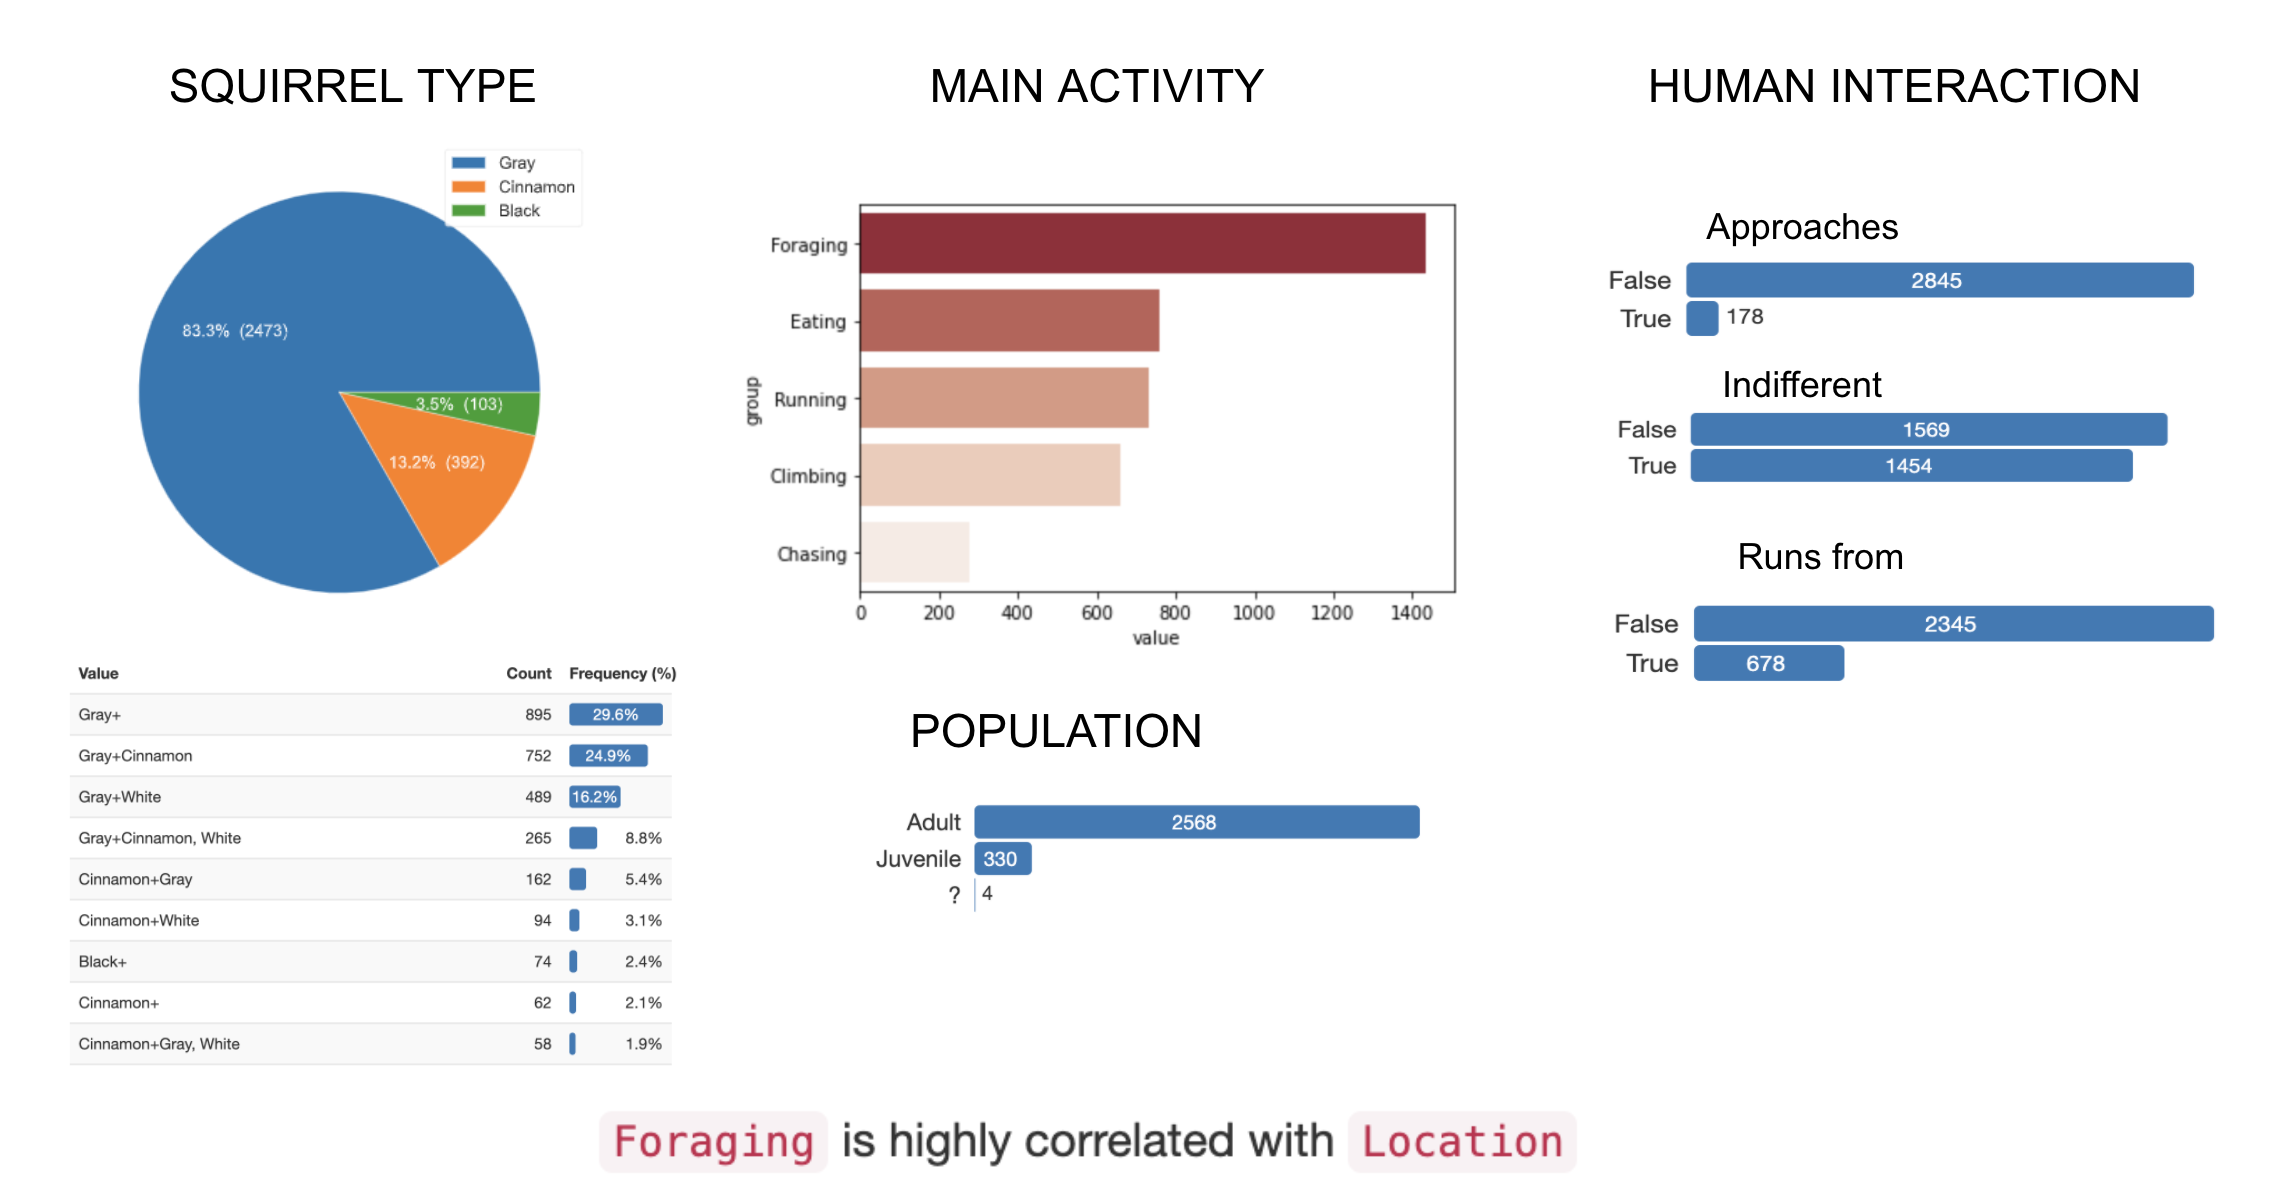

#### 1.1 Where are the squirrels located ?

We can observe 3 main areas where the squirrels are located :
 * North Meadow : it host sport fields areas and the Meadow also includes ample space for relaxing, picnicking and strolling. 
 * The Central Park Lake : Wooded area near the lake, with strong vegetation presence.
 * The tree House ( Sheep Meadow )
 * Maine Monument : Park South west corner. One of the entrance of the parks with kiosks
 
Zooming into the Heatmap, we observe that These central Park areas have trees and water areas or humans with some posible food activity ( picnic areas ). Having into account that the location of the squirrel is highly correlated with Foraging, and that in some ocassions they combine foraging with other activities, we could say that the squirrels might pick these areas as they are more related with food gathering and consumption.

In [4]:
import folium
from folium import plugins
m = folium.Map()
central_park_map = folium.Map(location=[40.7812,-73.9665], zoom_start=15000, tiles='Stamen Watercolor')
central_park_map

### Select the Data that we want from the Squirrels
data_geo_squirrels = data[['Y','X']]
data_location_squirrels = data_geo_squirrels.values

m.add_child(plugins.HeatMap(data_location_squirrels, radius=15))
m

#### 1.3 What are the Squirrels Doing ?

Autumn is the perfect period for Squirrels to collect their Nut Stash in order to prepare for the winter.  Therefore is normal that *Foraging* has been reported as the main activity for all the squirrels (46.31% of the total of activities reported) : note to say that even though they might been seen reported doing another activities,they *combine them with foraging*: as by the time they were repoted having a *foraging* activity, they also where eating 24.73 % of the time at the same time they were foraging, they also were running  14.21 % of the times , climbing 8.85 % and Chasing 3.76 % of the time. Eating while searching for food is definetly being crazy for nuts!(*Conclussion extracted from function overlapping activities*) Squirrels might know where to search for food, as the results from the EDA shows foraging is highly correlated with location.



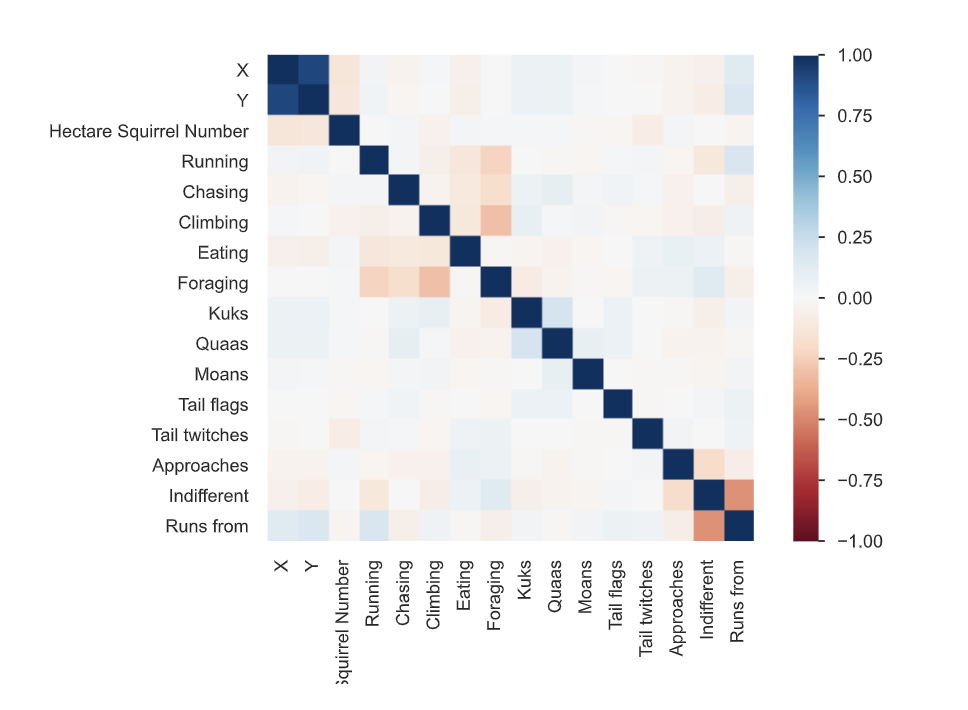

#### 1.4 How do Squirrels interact in between them ?

For analyzing how Squirrels communicate among them, we have taking into account Tail Flag and Tail Twitches:
    
    * *Tail flagging* is associated with conflict, frustation and intention to move. The primary message a squirrel sends with its wagging tail is a warning. They use it to alert other squirrels.     
    
    * *Tail twitches* Squirrels twitch their tails to let other squirrels know they sense danger. This also lets potential predators know the squirrel has detected the danger and there is no longer the element of surprise.

Communication among squirrels was reported 14.4 % of the times in Tail Flagging and 5% of the time tail Twitches.
Squirrels have used Tail flagging half of the times to alert other squirrels about the presence of humans.


In [5]:
squirrels_t = filter_dataset(data,'Tail twitches',1)
eda_analysis = eda(squirrels_t, 'eda_squirrels_Tail_twitches', 'eda_squirrels_Tail_twitches.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<AxesSubplot:>

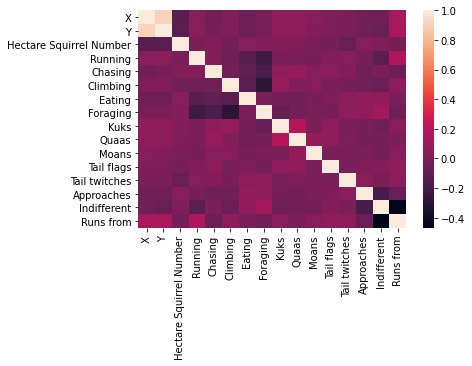

In [6]:
sns.heatmap(data.corr())


data.columns

#### 1.5 How do Squirrels interact with Humans ? 

Regarding relationship with humans, the observations tell us that they are divided towards indifference. Slightly more that half of the population (51.9%) was not indifferent from humans, and they tend to do tail swicthing half of the time to alert some other squirrels about humans. 

Besides, there is a negative correlation in between the *Indifference* and *runs from* fields : this means that as one variable increases, the other decreases. One interpretable idea comming from this might be that as the **indifference towards humans go up, the aquirrels tend to run less from them**. We can follow this hypothesis having into account the results from the EDA coming from indifferent squirrels, as 2/3 of them tend not to run. 


In [7]:
### Filter indiferent and see what they are doing 
squirrels_not_indiferent = filter_dataset(data,'Indifferent',False)
#eda_analysis = eda(squirrels_not_indiferent, 'eda_squirrels_not_indifferent', 'eda_squirrels_not_indifferent.html')


#### Code
Code that plots the squirrel activity separated by squirrel type. The main goal was to see if the activities were different depending on the kind of Squirrel.


In [8]:
bolean_to_int(data, "Running")
bolean_to_int(data, "Chasing")
bolean_to_int(data, "Climbing")
bolean_to_int(data,"Eating")
bolean_to_int(data,"Foraging")

bolean_to_int(data,"Kuks")
bolean_to_int(data,"Moans")
bolean_to_int(data,"Tail flags")
bolean_to_int(data,"Tail twitches")
bolean_to_int(data,"Quaas")


<AxesSubplot:xlabel='value', ylabel='group'>

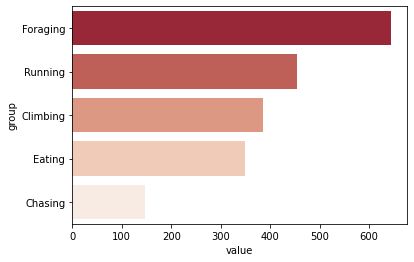

In [9]:
pal = sns.color_palette("RdBu",10)
df = pd.DataFrame({'group':["Running","Chasing","Climbing",
                        "Eating","Foraging"],
'value':[squirrels_not_indiferent['Running'].sum(),squirrels_not_indiferent['Chasing'].sum(), squirrels_not_indiferent['Climbing'].sum(),
        squirrels_not_indiferent['Eating'].sum(),squirrels_not_indiferent['Foraging'].sum()]})

fig_dims = (12, 9)
df = df.sort_values(['value'],ascending=False).reset_index(drop=True)
sns.barplot(x="value",
           y="group",
           data=df,
           estimator=sum,
           palette=pal)

In [10]:
def select_sub_columns(df, columns):
    """Select a subset of columns"""
    return df[[columns]]


<AxesSubplot:xlabel='value', ylabel='group'>

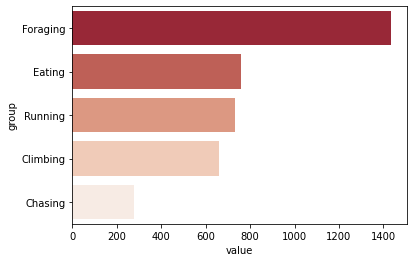

In [11]:
pal = sns.color_palette("RdBu",10)
df = pd.DataFrame({'group':["Running","Chasing","Climbing",
                        "Eating","Foraging"],
'value':[data['Running'].sum(),data['Chasing'].sum(), data['Climbing'].sum(),
        data['Eating'].sum(),data['Foraging'].sum()]})

fig_dims = (12, 9)
df = df.sort_values(['value'],ascending=False).reset_index(drop=True)
sns.barplot(x="value",
           y="group",
           data=df,
           estimator=sum,
           palette=pal)

In [12]:
def overlapping_activities(df,column1,column2):
    """Counts the number of times the squirrel was doing varoius things"""
    select = df.loc[(df[column1] == 1) & (df[column2] == 1)]
    print(len(select))
    print('percentaje with respect foragin', (len(select)*100)/data['Foraging'].sum())

In [13]:
overlapping_activities(data,'Foraging','Eating')


355
percentaje with respect foragin 24.738675958188153


In [14]:
overlapping_activities(data,'Foraging','Running')


204
percentaje with respect foragin 14.21602787456446


In [15]:
overlapping_activities(data,'Foraging','Climbing')


127
percentaje with respect foragin 8.850174216027874


In [16]:
overlapping_activities(data,'Foraging','Chasing')


54
percentaje with respect foragin 3.7630662020905925


In [17]:
### Interaction ith humans
## Select the Approaches, Runs from and Indifferent Column
data.columns


Index(['X', 'Y', 'Unique Squirrel ID', 'Hectare', 'Shift', 'Date',
       'Hectare Squirrel Number', 'Age', 'Primary Fur Color',
       'Highlight Fur Color', 'Combination of Primary and Highlight Color',
       'Color notes', 'Location', 'Above Ground Sighter Measurement',
       'Specific Location', 'Running', 'Chasing', 'Climbing', 'Eating',
       'Foraging', 'Other Activities', 'Kuks', 'Quaas', 'Moans', 'Tail flags',
       'Tail twitches', 'Approaches', 'Indifferent', 'Runs from',
       'Other Interactions', 'Lat/Long'],
      dtype='object')

<AxesSubplot:xlabel='value', ylabel='group'>

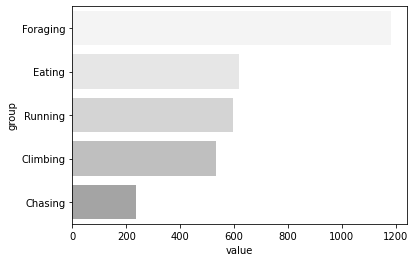

In [18]:
gray_squirrels = filter_dataset(data,'Primary Fur Color','Gray')
pal = sns.color_palette("Greys",10)
df = pd.DataFrame({'group':["Running","Chasing","Climbing",
                        "Eating","Foraging"],
'value':[gray_squirrels['Running'].sum(),gray_squirrels['Chasing'].sum(), 
         gray_squirrels['Climbing'].sum(),
        gray_squirrels['Eating'].sum(),gray_squirrels['Foraging'].sum()]})

fig_dims = (12, 9)
df = df.sort_values(['value'],ascending=False).reset_index(drop=True)
sns.barplot(x="value",
           y="group",
           data=df,
           estimator=sum,
           palette=pal)


<AxesSubplot:xlabel='value', ylabel='group'>

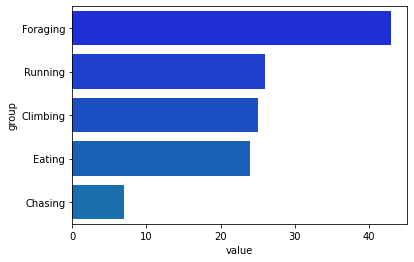

In [19]:
black_squirrels = filter_dataset(data,'Primary Fur Color','Black')
pal = sns.color_palette("winter",10)
df = pd.DataFrame({'group':["Running","Chasing","Climbing",
                        "Eating","Foraging"],
'value':[black_squirrels['Running'].sum(),black_squirrels['Chasing'].sum(), 
         black_squirrels['Climbing'].sum(),
        black_squirrels['Eating'].sum(),black_squirrels['Foraging'].sum()]})

fig_dims = (12, 9)
df = df.sort_values(['value'],ascending=False).reset_index(drop=True)
sns.barplot(x="value",
           y="group",
           data=df,
           estimator=sum,
           palette=pal)
